In [123]:

import acquire_ry
import ry_prepare
import ry_wrangle


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [124]:
# full wrangle test
train_exp, X_train, y_train, X_validate, y_validate, X_test, y_test = ry_wrangle.wrangle_github(cached=True)

acquiring data
preparing data
splitting data
complete
X-train shape (234, 6) X_validate shape (79, 6) X_test shape (79, 6)


In [125]:
check = pd.read_json('readmes2.json')

In [126]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   language  827 non-null    object
 1   content   827 non-null    object
dtypes: object(2)
memory usage: 19.4+ KB


In [127]:
train_exp.head()

,language,content,clean,stemmed,lemmatized,words,doc_length
26,HTML,Environmental_Data_Analytics\nData analytics c...,environmentaldataanalytics analytics course du...,environmentaldataanalyt analyt cours duke univ...,environmentaldataanalytics analytics course du...,"[environmentaldataanalytics, analytics, course...",73
36,Java,MinCED - Mining CRISPRs in Environmental Datas...,minced mining crisprs datasets minced program ...,minc mine crispr dataset minc program find clu...,minced mining crisprs datasets minced program ...,"[minced, mining, crisprs, datasets, minced, pr...",215
35,Python,Open Simulation Interface (OSI)\n\nThe Open Si...,open simulation interface osi open simulation ...,open simul interfac osi open simul interfac 1 ...,open simulation interface osi open simulation ...,"[open, simulation, interface, osi, open, simul...",258
156,Python,Community Water Model (CWatM)\nIIASA\n13rd Oct...,community water model cwatm iiasa 13rd october...,commun water model cwatm iiasa 13rd octob 2020...,community water model cwatm iiasa 13rd october...,"[community, water, model, cwatm, iiasa, 13rd, ...",241
546,HTML,EnvironmentalGame\nThis game was developed for...,environmentalgame game developed ' environment...,environmentalgam game develop ' environ scienc...,environmentalgame game developed ' environment...,"[environmentalgame, game, developedenvironment...",9


In [128]:
# check balance of dataset for under/over sampling
labels = pd.concat([train_exp.language.value_counts(), # get total counts of languages
                    train_exp.language.value_counts(normalize=True)], axis=1) # getting the prop of languages
labels.columns = ['n', 'percent']
labels
# balance is not bad, will not need to over/under sample

,n,percent
Python,83,0.354701
JavaScript,62,0.264957
HTML,49,0.209402
Java,40,0.170940


In [129]:
# create a list of words for each language category
python_words = ' '.join(train_exp[train_exp.language=='Python'].lemmatized)
js_words = ' '.join(train_exp[train_exp.language=='JavaScript'].lemmatized)
html_words = ' '.join(train_exp[train_exp.language=='HTML'].lemmatized)
java_words = ' '.join(train_exp[train_exp.language=='Java'].lemmatized)

# remove single letter words to reduce noise
python_words = re.sub(r'\s.\s', '', python_words)
js_words = re.sub(r'\s.\s', '', js_words)
html_words = re.sub(r'\s.\s', '', html_words)
java_words = re.sub(r'\s.\s', '', java_words)


In [130]:
# get the count of words by category
python_freq = pd.Series(python_words.split()).value_counts()
js_freq = pd.Series(js_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()


In [131]:
python_words
# note: 4 most common = '00', 'file', 'data', 'environmental'

"open simulation interface osi open simulation interfaceosi generic interface based googleprotocol buffer perception automated driving function virtual scenario complexity automated driving function rapidly increase requirement test development method growing testing virtual environment offer advantage completely controlled reproducible environment condition context osi defines generic interface ensure modularity integrability interchangeability individual component information osi see official documentation official reference documentation defined protobuf messagehanke hirsenkornvandriestengarciaramosschiementz schneider biebl2017 february 03 generic interface environment perception automated driving function virtual scenario retrieved january 25 2020 httpswwwhoteitumdeforschungautomotiveveroeffentlichungen usage example writing reading osi message python osi3osisensorviewpb2 import sensorview osi3osisensordatapb2 import sensordata def main initialize sensorview sensordata sensorview 

In [132]:
js_words
# note: 'data', 'file', 'environmental' are in top 5 words

"people feel shipping json yml xml config file upgrade using archaic environment variablelet app load config inject instead unix environment var ideal configuration yet encounter applicationbetter override value nearruntime without changebackup config file debug node runjs inject environment variable password api key memory process belonging nonprivileged user source envsproductionsh sudo ehu wwwdata node runjs without run write software inherit inside stagingsh source productionsh inside kevinsh source developmentsh operating system aware provides tool inspect debug optionally pas process etc directly use config across language eg supporting bash script directly use config terminal eg cd myappdir type config groupsave file keep version control one downside environment variable little convention syntactic sugar highlevel languagefeel atomic thinklikely let module attempt changebreak 12factor get way impose one way dealing environment variable make var available nested format inside app

In [133]:
html_words
# note: 'data', 'file', 'environmental' are top 3 words

"environmentaldataanalytics analytics course duke university course code env 872l user kateri salk instruction using repository fork repository github account clone forked repository onto local drive pull update repository add repository upstream remote git remote add upstream httpsgithubcomkaterisalkenvironmentaldataanalytics verify repository upstream remote git remoterepository listed origin repository listed upstream pull update repository git pull upstream master git fetch upstream git merge upstreammaster conflict arises merge update file liking stage commit testing merge error taylor environmentalgame game developedenvironment scienceclass universidade federal rio grande brazil earth genome decision making dan hammer chief scientist earth genome jeff chen chief scientistdepartment commerce part commerce usability project earth genome collaboration commerce service created tutorial guide though processing visualizating digital elevation model question feel free reach commerce ser

In [134]:
java_words
# note: 'data', 'file', 'environmental' are in top 5 words

"minced mining crisprs datasets minced program find clustered regularly interspaced short palindromic repeat crisprs full genome datasets assembled contigs metagenomes iff want identify crisprs raw short read size range 100200bp try using crass httpsgithubcomctskennertoncrass minced run commandline derived crt httpwwwroom220comcrt charles bland et al crispr recognition tool crt tool automatic detection clustered regularly interspaced palindromic repeat bmc bioinformatics1 2007 209 installation need install dependency first java httpwwwjavacomendownload makefile source directory installation simple cd downloadfolder make run minced minced option filefa help page obtained typing minced help get minced version way minced version note always keep minced mincedjar folder example finding crisprscoli genome minced ecolifna find repeat short sequence need decrease minimum number repeat find example 100 bp read could possibly findrepeat minced minnrmetagenomefna output large save minced minnrme

In [135]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import ComplementNB, MultinomialNB


In [136]:
# clf = MultinomialNB()
# clf.fit(X, y)

# Word clouds for presentation?

In [137]:
from wordcloud import WordCloud
from PIL import Image

In [159]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 215 # 0 - 360
    s = 85 # 0 - 100
    l = random_state.randint(30, 90) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

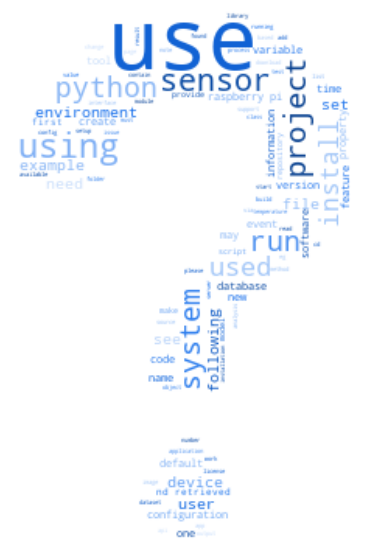

In [160]:
plt.figure(figsize=(16,10))
text = python_words + js_words + html_words + java_words
mask = np.array(Image.open('simple.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=2000, max_font_size=224,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=one_color_func)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()